1. Modifying the model in lab 3.2 to do Regression

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def initialize_parameters(nx,nh,ny):
    #set the random seed so the same random values are generated every time you run this function
    np.random.seed(1)

    #initialize weights to small random numbers and biases to zeros for each layer
    W1=np.random.uniform(size=(nh,nx), low=-0.01, high=0.01)
    b1=np.zeros((nh,1))
    W2=np.random.uniform(size=(ny,nh), low=-0.01, high=0.01)
    b2=np.zeros((ny,1))
   
    #create a dictionary of network parameters
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
#Forward Pass
#relu activation
def relu(z):
    return np.maximum(0,z)

In [ ]:
def forward_pass(parameters,X):
    #dot product of the weight times the input plus bias
    Z1= np.dot(parameters["W1"],X)+parameters["b1"] # b1 is broadcasted n times before it is added to np.dpt(W1,X1)
    A1=relu(Z1) #apply relu activation on the output
    #dot product of weights times A1 plus bias
    Z2=np.dot(parameters["W2"],A1)+parameters["b2"] #b2 is broadcasted n times before it is added to np.dpt(W2,A1)
    Yhat=Z2 #no activation function on regression problems
   
   #cache to store values to use in the backward pass
    cache = {"A1": A1,
             "Z1":Z1,
             "Z2": Z2}
    return Yhat,cache

In [ ]:
#using mean squared error for the loss function
def compute_loss(Y,Yhat):
    n=Y.shape[1] 
    loss = (1/n) * np.sum((Y - Yhat)**2)
    return loss

In [ ]:
#Backward Pass
#Gradient of Mean Squared Error loss function
def dMSE (Y, Yhat):
    dMSE = Yhat - Y
    return (dMSE)

#Derivative of Relu
def drelu(Z):
    drelu=np.where(Z>0, 1.0, 0.0) 
    return drelu 

In [ ]:
def backward_pass(parameters, cache, X, Y, Yhat):
    n=X.shape[1]

    dZ2=dMSE(Y,Yhat) #*(cache["Z2"]) removed this because Yhat IS Z2 so you're multiplying the same thing together #no activation function on Z2
    dW2=(1/n)*np.dot(dZ2,cache["A1"].T)
    db2=(1/n)*np.sum(dZ2, axis=1, keepdims=True)
    dA1=np.dot(parameters["W2"].T,dZ2)
    dZ1=dA1*drelu(cache["Z1"])
    dW1=(1/n)*np.dot(dZ1,X.T)
    db1=(1/n)*np.sum(dZ1, axis=1, keepdims=True)
    gradients={"dW1": dW1,
             "db1": db1,
             "dW2":dW2,
              "db2":db2
              }
    return gradients

In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    parameters["W1"]=parameters["W1"]-learning_rate*gradients["dW1"]
    parameters["W2"]=parameters["W2"]-learning_rate*gradients["dW2"]
    parameters["b1"]=parameters["b1"]-learning_rate*gradients["db1"]
    parameters["b2"]=parameters["b2"]-learning_rate*gradients["db2"]
    return parameters

In [ ]:
def create_nn_model(train_X,train_Y,nh, val_X, val_Y, num_iterations, learning_rate):
  
    assert(train_X.shape[0]==val_X.shape[0]), "train_X and val_X must have the same number of features"
    assert(train_X.shape[1]==train_Y.size), "train_X and train_Y must have the same number of examples"
    assert(val_X.shape[1]==val_Y.size), "val_X and val_Y must have the same number of examples" 
    
    
    #getting the number of features
    nx=train_X.shape[0]
    
    #one neuron in output layer with no activation function
    ny=1
    
    # initializing the parameteres
    parameters=initialize_parameters(nx,nh,ny)
    
    #initialize lists to store the training and valideation losses for each iteration. 
    val_loss=[]
    train_loss=[]
    
    #run num_iterations of gradient descent
    for i in range (0, num_iterations):
        #run the forward pass on train_X
        Yhat_train, train_cache= forward_pass(parameters,train_X)
        
        #run the forward pass on val_X
        Yhat_val,val_cache= forward_pass(parameters,val_X)
        
        #compute the loss on the train and val datasets
        train_loss.append(compute_loss(train_Y,Yhat_train))
        val_loss.append(compute_loss(val_Y,Yhat_val))

        """
        run the backward pass. Note that the backward pass is only run on the training data not the validation data
        Because the learning must be only done on the training data and hence, validation data is not used to update
        the model parameters.  
        """
        gradients=backward_pass(parameters, train_cache, train_X, train_Y,Yhat_train)
        
        # update the parameters
        parameters=update_parameters(parameters, gradients, learning_rate)
        
        #print the trianing loss and validation loss for each iteration.
        print("iteration {} :train_loss:{} val_loss{}".format(i,train_loss[i],val_loss[i]))
        
    #create a dictionary history and put train_loss and validaiton_loss in it
    history={"val_loss": val_loss,
             "train_loss": train_loss}
        
        #return the parameters and the history
    return parameters, history

In [ ]:
#get predictions
def predict(parameters,X):
    Yhat,cache=forward_pass(parameters, X)
    return Yhat

2. Preparing California Housing Data

In [ ]:
#load the data
df = pd.read_csv("sample_data/california_housing_train.csv")

In [ ]:
df.shape

(17000, 9)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
#split training data into 80% training and 20% validation
train = df.sample(frac=0.8, random_state=123)
val = df.drop(train.index)

In [ ]:
print(train.shape)
print(val.shape)

(13600, 9)
(3400, 9)


In [ ]:
# reading the input datasets train.csv and validation.csv and store them into numpy arrays
train = train.to_numpy()
test = pd.read_csv('sample_data/california_housing_test.csv').to_numpy()
val = val.to_numpy()

In [ ]:
test.shape

(3000, 9)

In [ ]:
#separate the features from the target variable (median_house_value) in train, val and test
train_X = train[:,:-1]
train_Y = train[...,-1] #labels

test_X = test[:,:-1]
test_Y = test[...,-1] #labels

val_X = val[:,:-1]
val_Y = val[...,-1] #labels

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(val_X.shape)
print(train_Y.shape)
print(test_Y.shape)
print(val_Y.shape)
print(test_Y)

(13600, 8)
(3000, 8)
(3400, 8)
(13600,)
(3000,)
(3400,)
[344700. 176500. 270500. ...  62000. 162500. 500001.]


In [ ]:
#normalize the data: subtract mean of each feature and divide by the std, so that the feature is centered around 0 and has a unit std
train_norm = (train_X - np.mean(train_X, axis=0))/np.std(train_X, axis=0)
test_norm = (test_X - np.mean(train_X, axis=0))/np.std(train_X, axis=0)
val_norm = (val_X - np.mean(train_X, axis=0))/np.std(train_X, axis=0)

print(train_norm.shape)
print(test_norm.shape)
print(val_norm.shape)

(13600, 8)
(3000, 8)
(3400, 8)


In [ ]:
#divide the median_house_values by 100k to scale them down
train_Y = train_Y/100000
test_Y = test_Y/100000
val_Y = val_Y/100000

In [ ]:
#transpose feature matricies for train,test,val and reshape target vectors to 2D arrays
train_norm = train_norm.transpose()
test_norm = test_norm.transpose()
val_norm = val_norm.transpose()

In [ ]:
train_Y=np.reshape(train_Y, (1, train_Y.size))
test_Y=np.reshape(test_Y, (1, test_Y.size))
val_Y=np.reshape(val_Y, (1, val_Y.size))

In [ ]:
print(train_norm.shape)
print(train_Y.shape)
print(val_norm.shape)
print(val_Y.shape)
print(test_norm.shape)
print(test_Y.shape)

(8, 13600)
(1, 13600)
(8, 3400)
(1, 3400)
(8, 3000)
(1, 3000)


In [ ]:
print(train_norm)

[[ 1.24677127 -1.25325691  0.83758503 ...  0.8226148  -0.15045006
   1.20186059]
 [-1.4115248   1.07578173 -0.79904894 ... -0.94398598  0.42590277
  -1.32269242]
 [-0.5241687   0.50848037 -1.15964505 ...  0.66734946  0.42904583
  -0.5241687 ]
 ...
 [ 1.5769497   0.35804834 -0.71440947 ... -0.90294458 -0.53113582
  -0.18475737]
 [ 1.83553998  0.43008071 -0.44898931 ... -0.90694795 -0.60427414
   0.269532  ]
 [-0.91672605  0.63369272 -0.78484527 ...  3.43211399 -0.77908144
  -0.7285289 ]]


3. Training and hyper-parameter tuning

In [ ]:
iterations= 2000
parameters, history=create_nn_model(train_norm,train_Y,128, val_norm, val_Y, iterations, 0.3)

iteration 0 :train_loss:5.629278381831812 val_loss5.690261924048548
iteration 1 :train_loss:3.4256438714559265 val_loss3.480361791403734
iteration 2 :train_loss:2.347095020270553 val_loss2.3973622734830973
iteration 3 :train_loss:1.8156431067258187 val_loss1.8625256262841148
iteration 4 :train_loss:1.5500815400110144 val_loss1.594179653881603
iteration 5 :train_loss:1.4117172517940586 val_loss1.4532612959018516
iteration 6 :train_loss:1.3316057517353783 val_loss1.3705281487741054
iteration 7 :train_loss:1.275123288437766 val_loss1.3111153340423105
iteration 8 :train_loss:1.2247246939055558 val_loss1.2573178203190691
iteration 9 :train_loss:1.1717560822936641 val_loss1.200384830490324
iteration 10 :train_loss:1.1127315333364638 val_loss1.136809173350687
iteration 11 :train_loss:1.0477258768520177 val_loss1.0668565895329294
iteration 12 :train_loss:0.9796227069434857 val_loss0.9937403052498149
iteration 13 :train_loss:0.9130288966183586 val_loss0.9224840591827036
iteration 14 :train_loss

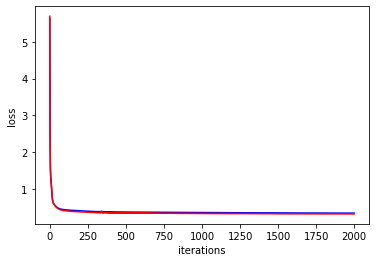

In [ ]:
plt.plot(range(0,iterations),history["train_loss"],'b')
plt.plot(range(0,iterations),history["val_loss"],'r')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

Regardless of the learning rate, number of iterations, or number of neurons, the loss for both lines stays around 5.0-6.0. Increasing the learning rate introduced NaN's, but decreasing it from 0.01 to 0.001 made both lines start to slightly increase near the end. Increasing the number of neurons from 50 to 128 made both lines start to decrease near the end. Increasing the number of iterations  to 3000 showed that the lines continue to decrease.  Increasing from 3000 to 5000 iterations showed a hint of flattening out. Validation loss was always lower than training loss. 

4. Model Evaluation

In [ ]:
#define a function to calculate the MAPE
def MAPE(observedY, predictedY):
    n=observedY.shape[1] 
    mape = (1/n) * (np.sum((abs(observedY - predictedY))/observedY))
    return mape

In [ ]:
predicted_test = predict(parameters, test_norm)

In [ ]:
predicted_test

array([[3.94190115, 1.75359539, 2.75892627, ..., 0.98139326, 1.06674699,
        4.88331738]])

In [ ]:
NN_MAPE = MAPE(test_Y, predicted_test)
print("The MAPE of the NN model is: ", NN_MAPE)

The MAPE of the NN model is:  0.2265628201729831


In [ ]:
#transpose training data back
train_norm = train_norm.T

In [ ]:
#flatten target array back to 1D
train_Y = train_Y.flatten()

In [ ]:
print(train_Y)

[1.355   2.332   1.25    ... 5.00001 0.725   1.778  ]


In [ ]:
#fit linear regression model
from sklearn.linear_model import LinearRegression
Linear_model=LinearRegression().fit(train_norm, train_Y)

In [ ]:
#transpose test data back
test_T = test_norm.T

In [ ]:
LR_test_predict = Linear_model.predict(test_T)

In [ ]:
LR_MAPE = MAPE(test_Y, LR_test_predict)
print("The MAPE of the LR model is: ", LR_MAPE)

The MAPE of the LR model is:  0.29721536518246816


It seems that the LR model performed much better than the NN model because the MAPE was lower.#after fixing the backwards pass, the NN model performed better
